In [2]:
import cv2
import numpy as np

image1 = cv2.imread('firefox_dhO2wuVudt.png')
image2 = cv2.imread('newImages/img0.png')


In [3]:
orb1 = cv2.ORB_create(1000, 1.1, 13)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

kp_master, des_master = orb1.detectAndCompute(image1, None)
kp_secondary, des_secondary = orb1.detectAndCompute(image2, None)

matches = bf.match(des_secondary, des_master)

selected = []
for m in matches:
    if m.distance < 40:
        selected.append(m)

In [4]:
dst_pts = np.float32([kp_master[m.trainIdx].pt for m in selected]).reshape(-1, 1, 2)
src_pts = np.float32([kp_secondary[m.queryIdx].pt for m in selected]).reshape(-1, 1, 2)

h_matrix, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

warped = cv2.warpPerspective(image2, h_matrix, dsize=(600, 600), flags=cv2.INTER_LINEAR)

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\calib3d\src\fundam.cpp:385: error: (-28:Unknown error code -28) The input arrays should have at least 4 corresponding point sets to calculate Homography in function 'cv::findHomography'


In [17]:
cv2.imshow('Warped Image', warped)

# Очікування натискання клавіші для завершення
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
combined_image = np.hstack((image1, image2, warped))
cv2.imshow('Combined Images', combined_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 378 and the array at index 1 has size 480

In [13]:
import cv2
import numpy as np

image1 = cv2.imread('objImages/1.jpg')
image2 = cv2.imread('newImages/img1.png')

image1 = cv2.resize(image1, (600, 600))
image2 = cv2.resize(image2, (600, 600))

orb1 = cv2.ORB_create(1000, 1.1, 13)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

kp_master, des_master = orb1.detectAndCompute(image1, None)
kp_secondary, des_secondary = orb1.detectAndCompute(image2, None)

matches = bf.match(des_secondary, des_master)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

selected = matches[:15]

pts_master = np.float32([kp_master[m.trainIdx].pt for m in selected]).reshape(-1, 1, 2)
pts_secondary = np.float32([kp_secondary[m.queryIdx].pt for m in selected]).reshape(-1, 1, 2)

h_matrix, mask = cv2.findHomography(pts_secondary, pts_master, cv2.RANSAC, 5.0)

warped = cv2.warpPerspective(image2, h_matrix, dsize=(600, 600), flags=cv2.INTER_LINEAR)


for point in pts_master:
    x, y = point[0]
    cv2.circle(image1, (int(x), int(y)), 3, (0, 0, 255, 255), -1)

for point in pts_secondary:
    x, y = point[0]
    cv2.circle(image2, (int(x), int(y)), 3, (0, 0, 255, 255), -1)


combined_image = np.hstack((image1, image2, warped))

for i in range(len(pts_master)):
    cv2.line(combined_image, (int(pts_master[i][0][0]), int(pts_master[i][0][1])),
             (int(pts_secondary[i][0][0] + image1.shape[1]), int(pts_secondary[i][0][1])), (255, 0, 0, 255), 1)
             
cv2.imshow('Combined Images', combined_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('1.jpg')  # query Image
img2 = cv2.imread('2.jpg') # target Image

# Initiate SIFT detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x : x.distance)

good_matches = matches[:20]

src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

matchesMask = mask.ravel().tolist()
h,w = img1.shape[:2]
pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)

dst = cv2.perspectiveTransform(pts, M)
dst += (w, 0)  # adding offset

draw_params = dict(matchColor = (0, 255, 0), # draw matches in green color
               singlePointColor = None,
               matchesMask = matchesMask, # draw only inliers
               flags = 2)


img3 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None,**draw_params)

# Draw bounding box in Red
img3 = cv2.drawContours(img3, [np.int32(dst)], -1, (0, 0, 255), 5)


# # З'єднання кожної точки з кожною
# for i in range(4):
#     for j in range(4):
#         if i != j:
#             x1, y1 = map(int, dst[i][0])
#             x2, y2 = map(int, dst[j][0])
#             cv2.line(img3, (x1, y1), (x2, y2), (0, 0, 255), 5)

img3 = cv2.resize(img3, (1200, 600))

cv2.imshow("result", img3)
cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\calib3d\src\fundam.cpp:385: error: (-28:Unknown error code -28) The input arrays should have at least 4 corresponding point sets to calculate Homography in function 'cv::findHomography'


In [13]:
dst

array([[[ 211.66032 ,  230.66673 ]],

       [[ 121.725914, 1050.632   ]],

       [[1151.0502  , 1053.056   ]],

       [[1048.6758  ,  259.68735 ]]], dtype=float32)

In [19]:
import numpy as np 
import cv2 
  
# Завантаження зображень 
image1 = cv2.imread('objImages/1.jpg')  
image2 = cv2.imread('newImages/img1.png') 
image2 = cv2.resize(image2, (640, 480))

sift = cv2.SIFT_create() 
  
keypoints1, descriptors1 = sift.detectAndCompute(image1, None) 
keypoints2, descriptors2 = sift.detectAndCompute(image2, None) 

BFMatch = cv2.BFMatcher() 
Matches = BFMatch.knnMatch(descriptors1, descriptors2, k=2) 

# Фільтрація матчів за допомогою ratio test 
good_matches = []
for m, n in Matches:
    if m.distance < 0.5 * n.distance:
        good_matches.append(m)

# Візуалізація відфільтрованих матчів
Matched = cv2.drawMatchesKnn(image1, keypoints1, image2, keypoints2, [good_matches], None, flags=0)

# Збереження зображення 
cv2.imwrite('BFMatch.jpg', Matched)

True

In [21]:
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

matchesMask = mask.ravel().tolist()
h,w = image1.shape[:2]
pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)

dst = cv2.perspectiveTransform(pts, M)
dst += (w, 0)  # adding offset

draw_params = dict(matchColor = (0, 255, 0), # draw matches in green color
               singlePointColor = None,
               matchesMask = matchesMask, # draw only inliers
               flags = 2)


img3 = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None,**draw_params)

# Draw bounding box in Red
img3 = cv2.drawContours(img3, [np.int32(dst)], -1, (0, 0, 255), 5)

# cv2.imshow("result", warped)
# cv2.waitKey()
# cv2.destroyAllWindows()

cv2.imwrite('q.jpg', img3)

True

In [130]:
dst

array([[[3018.7122, 1720.1545]],

       [[2212.192 , 2368.9666]],

       [[3332.4697, 3104.4688]],

       [[4037.196 , 2161.9297]]], dtype=float32)

In [241]:
import cv2
import numpy as np

# Ваші 3D-точки
object_points = np.array([[0, 0, 0], [0, 1, 0], [1, 1, 0], [1, 0, 0]], dtype=np.float32)

# Ваші 2D-точки
image_points = np.array([[0, 0], [0, 100], [100, 100], [100, 0]], dtype=np.float32)

# Камерні параметри
focal_length = 1
center = (50, 50)
camera_matrix = np.array([[focal_length, 0, center[0]], [0, focal_length, center[1]], [0, 0, 1]], dtype=np.float32)

# Використання solvePnP
_, rotation_vector, translation_vector = cv2.solvePnP(object_points, image_points, camera_matrix, None)

print("Rotation Vector: ", rotation_vector)
print("Translation Vector: ", translation_vector)


Rotation Vector:  [[ 1.12560780e-20]
 [-1.12560780e-20]
 [ 3.28880021e-32]]
Translation Vector:  [[-0.5 ]
 [-0.5 ]
 [ 0.01]]


In [641]:
import numpy as np 
import cv2 
  
# Завантаження зображень 
image1 = cv2.imread('1.jpg')  
image2 = cv2.imread('5.jpg') 

sift = cv2.SIFT_create() 
  
keypoints1, descriptors1 = sift.detectAndCompute(image1, None) 
keypoints2, descriptors2 = sift.detectAndCompute(image2, None) 

BFMatch = cv2.BFMatcher() 
Matches = BFMatch.knnMatch(descriptors1, descriptors2, k=2) 

# Фільтрація матчів за допомогою ratio test 
good_matches = []
for m, n in Matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)


src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

matchesMask = mask.ravel().tolist()
h,w = image1.shape[:2]
pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)

Rotation Vector:  [[-9.30203794e-01 -9.88017065e-01  3.14526207e-04]
 [ 3.67042450e-01  1.54343886e-01  1.31128595e-03]
 [-8.61467157e-04  4.94667627e-04  2.19072936e-01]]
Translation Vector:  [2929.74586858 1011.96882497    2.99656212]
Rotation Vector:  [[-1.18424715]
 [ 1.22353149]
 [ 1.17320212]]
Translation Vector:  [[ 0.49758287]
 [-0.03541458]
 [ 0.50553095]]
normal:  [[-0.66565884]
 [ 0.48744314]
 [ 0.56506416]]


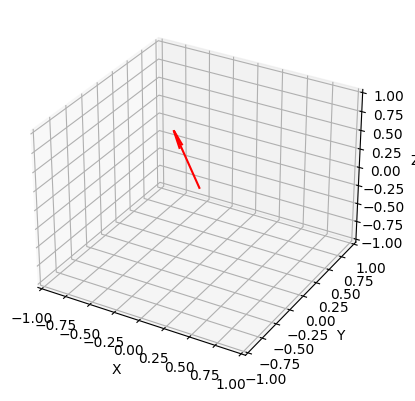

In [643]:
points2D = cv2.perspectiveTransform(pts, H)

camera_matrix = np.eye(3)

camera_matrix = np.array([[1416.0, 0, 950],
                          [0, 1418, 508],
                          [0, 0, 1]])
distCoeff = np.array([0.19, -0.86, 0.0, 0.0, 1.10], dtype=np.float32)


axisBoxes = np.float32([[0,0,0], [0,3,0], [3,3,0], [3,0,0], [0,0,-3], [0,3,-3], [3,3,-3]])

# Декомпозиція матриці гомографії
retval, rotations, translations, normals = cv2.decomposeHomographyMat(H, camera_matrix)

object_points = np.array([[0,0,0], [0,1,0], [1,0,0], [1,1,0]], dtype=np.float32)

# Використання solvePnP
_, rotation_vector1, translation_vector1 = cv2.solvePnP(object_points, points2D, camera_matrix, distCoeff)

camera_pose = camera_pose_from_homography(H)
r_vector = camera_pose[:, :-1]
t_vector = camera_pose[:, -1]

print("Rotation Vector: ", r_vector)
print("Translation Vector: ", t_vector)

# # Приклад використання функції
# object_points = [(0, 0), (0, 1), (1, 1), (1, 0)]
# points = [(432, 89), (46, 736), (1021, 1227), (1001, 526)]

# camera_pose = CameraPose.find_camera_pose(object_points, points, image2.shape[:-1])
# print("Rotation Vector: ", camera_pose.rotationVector)
# print("Translation Vector: ", camera_pose.translationVector)

# Вибираємо перший набір повороту та перекладу (можна вибрати будь-який)
rotation_vector = rotation_vector1
translation_vector = translation_vector1

print("Rotation Vector: ", rotation_vector)
print("Translation Vector: ", translation_vector)

image_points, _ = cv2.projectPoints(object_points, rotation_vector, translation_vector, camera_matrix, distCoeff)


img3 = cv2.drawContours(image2, [np.int32(points2D)], -1, (0, 0, 255), 5)

point1 = ( int(points2D[0][0][0]), int(points2D[0][0][1]))
point2 = ( int(image_points[0][0][0]), int(image_points[0][0][1]))
img3 = cv2.line(img3, point1, point2, (0,0,255), 5)

img3 = cv2.resize(img3, (600, 600))

cv2.imshow("result", img3)
cv2.waitKey()
cv2.destroyAllWindows()

normal = normals[0]
print('normal: ', normal)

# base_normal = np.array([0, 0, 1])
# new_normal = np.dot(np.linalg.inv(H).T, normal)

# normal = new_normal
# print('normal: ', normal)

# Створення графіку
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, normal[0], normal[1], normal[2], length=0.7, normalize=True, color='r')

# Налаштування параметрів графіка
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Виведення графіка
plt.show()

(100, 100) (100, 100) [[8.32786195e-04]
 [9.24333826e-05]
 [9.99999649e-01]] [[8.32786195e-04]
 [9.24333826e-05]
 [9.99999649e-01]]


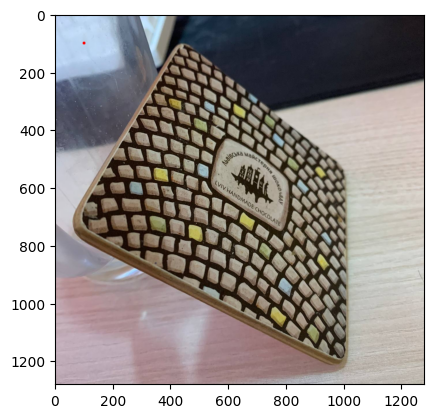

In [115]:
# Вхідні дані
image_path = '4.jpg'
image = cv2.imread(image_path)

# Вектор нормалі
normal_vector = normal

# Координати точки на зображенні
point = (100, 100)

# Нормалізація вектора
normal_vector /= np.linalg.norm(normal_vector)

# Масштабування вектора нормалі
scaled_normal = normal_vector * 100

# Обчислення кінцевої точки стрілки
end_point = (int(point[0] + scaled_normal[0]), int(point[1] + scaled_normal[1]))

# Малюємо стрілку на зображенні
image = cv2.arrowedLine(image, point, end_point, (0, 0, 255), 10)
print(point, end_point, normal, normal_vector)

# Відображення зображення
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

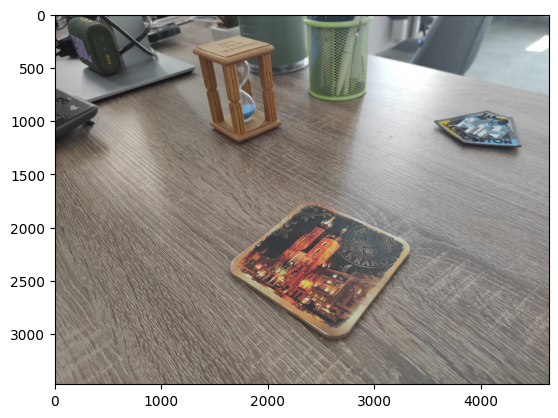

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Вхідні дані
image_path = 'find_tea_cup_pad_pose.jpg'
image = cv2.imread(image_path)

# Вектор нормалі
normal_vector = [0.001, 0.002, 0.999]

# Координати точки на зображенні
point = (100, 100)

# Нормалізація вектора
normal_vector /= np.linalg.norm(normal_vector)

# Множення на масштаб та додавання до точки для відображення стрілки
end_point = (int(point[0] + 100 * normal_vector[0]), int(point[1] + 100 * normal_vector[1]))

# Малюємо лінію чи стрілку на зображенні
cv2.arrowedLine(image, point, end_point, (0, 0, 255), 2)

# Відображення зображення
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [179]:
import numpy as np
import cv2

def cameraPoseFromHomography(H):
    pose = np.eye(3, 4, dtype=np.float32)  # 3x4 matrix, the camera pose
    norm1 = np.linalg.norm(H[:, 0])
    norm2 = np.linalg.norm(H[:, 1])
    tnorm = (norm1 + norm2) / 2.0  # Normalization value

    p1 = H[:, 0]  # First column of H
    p2 = np.zeros(p1.shape)  # First column of pose (empty)
    cv2.normalize(p1, p2, alpha=0, beta=1, norm_type=cv2.NORM_L2)  # Normalize the rotation, and copies the column to pose

    p1 = H[:, 1]  # Second column of H
    p2 = np.zeros(p1.shape)  # Second column of pose (empty)
    cv2.normalize(p1, p2, alpha=0, beta=1, norm_type=cv2.NORM_L2)  # Normalize the rotation and copies the column to pose

    p1 = pose[:, 0]
    p2 = pose[:, 1]
    p3 = np.cross(p1, p2)  # Computes the cross-product of p1 and p2
    pose[:, 2] = p3  # Third column is the cross product of columns one and two

    pose[:, 3] = H[:, 2] / tnorm  # vector t [R|t] is the last column of pose

    return pose

def cameraPoseFromHomography2(H):
    H1 = H[:, 0]
    H2 = H[:, 1]
    H3 = np.cross(H1, H2)

    norm1 = np.linalg.norm(H1)
    norm2 = np.linalg.norm(H2)
    tnorm = (norm1 + norm2) / 2.0

    T = H[:, 2] / tnorm
    camera_pose = np.mat([H1, H2, H3, T]).T
    return camera_pose[:,:-1], camera_pose[:,-1]

camera_pose = cameraPoseFromHomography2(H).T

rotation_pose = camera_pose[:,:-1]
translation_pose = camera_pose[:,-1]

print(translation_pose)
print("Camera Pose:\n", camera_pose, '\n\n' , H)

[[ 742.88783019]
 [2938.83430776]
 [   4.72215878]]
Camera Pose:
 [[ 4.01262194e-01 -1.32267747e-02  4.52050607e-06  7.42887830e+02]
 [-2.09855606e-02  1.72313621e-02  1.17035813e-04  2.93883431e+03]
 [ 9.67576893e-05 -2.94858592e-04  6.63672288e-03  4.72215878e+00]] 

 [[ 4.01262194e-01 -1.32267747e-02  1.57319537e+02]
 [-2.09855606e-02  1.72313621e-02  6.22349745e+02]
 [ 9.67576893e-05 -2.94858592e-04  1.00000000e+00]]


In [348]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv2.imread('1.jpg')  
img2 = cv2.imread('2.jpg')  

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv2.imshow("result", img3)
cv2.waitKey()
cv2.destroyAllWindows()

In [644]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10

img1 = cv.imread('template_notebook.jpg') # queryImage
img2 = cv.imread('find_notebook_pose.jpg') # trainImage

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 1

index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w,c = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
 singlePointColor = None,
 matchesMask = matchesMask, # draw only inliers
 flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

cv2.imwrite('r.jpg', img3)

True

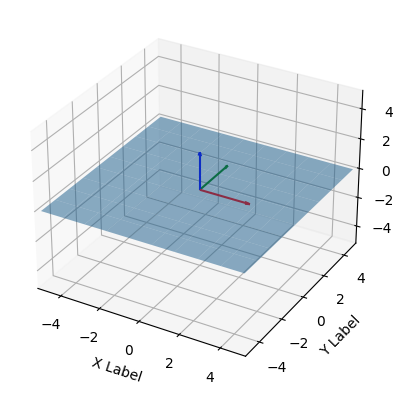

In [648]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Створення фігури та 3D-площини
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Визначення точок на площині
X, Y = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5, 10))
Z = np.zeros_like(X)  # Значення Z для площини, якщо вона паралельна площині XY

# Малювання площини
ax.plot_surface(X, Y, Z, alpha=0.5)

# Додавання векторів для трьох осей
origin = (0, 0, 0)
x_axis = (5, 0, 0)
y_axis = (0, 5, 0)
z_axis = (0, 0, 5)

ax.quiver(*origin, *x_axis, color='r', length=0.5, arrow_length_ratio=0.1)
ax.quiver(*origin, *y_axis, color='g', length=0.5, arrow_length_ratio=0.1)
ax.quiver(*origin, *z_axis, color='b', length=0.5, arrow_length_ratio=0.1)

# Налаштування меж та міток
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Виведення графіка
plt.show()

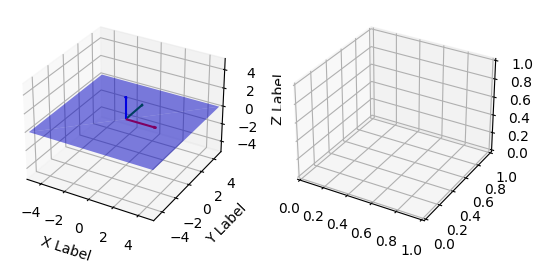

In [676]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Створення фігури та 3D-площини
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')

# # Визначення точок на площині
# X, Y = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5, 10))
# Z = np.zeros_like(X)  # Значення Z для площини, якщо вона паралельна площині XY

# # Малювання площини
# ax1.plot_surface(X, Y, Z, alpha=0.5)


# Створення точок
points = np.array([[-5, -5, 0], [-5, 5, 0], [5, -5, 0], [5, 5, 0]])

# Дістаньте координати X, Y, Z
X = points[:, 0]
Y = points[:, 1]
Z = points[:, 2]

# Намалюйте площину
ax1.plot_trisurf(X, Y, Z, alpha=0.5, color='b')



# Додавання векторів для трьох осей
origin = (0, 0, 0)
x_axis = (5, 0, 0)
y_axis = (0, 5, 0)
z_axis = (0, 0, 5)

ax1.quiver(*origin, *x_axis, color='r', length=0.5, arrow_length_ratio=0.1)
ax1.quiver(*origin, *y_axis, color='g', length=0.5, arrow_length_ratio=0.1)
ax1.quiver(*origin, *z_axis, color='b', length=0.5, arrow_length_ratio=0.1)


# Налаштування меж та міток
ax1.set_xlim([-5, 5])
ax1.set_ylim([-5, 5])
ax1.set_zlim([-5, 5])
# Налаштування меж та міток
ax1.set_xlabel('X Label')
ax1.set_ylabel('Y Label')
ax1.set_zlabel('Z Label')


# Визначення матриці гомографії
H = np.array([[0.8, 0.2, 0, 0],
              [0.1, 1.2, 0, 0],
              [0.001, 0.001, 1, 0]])

# Перетворення точок за допомогою матриці гомографії
transformed_points = np.dot(H, np.vstack((X.flatten(), Y.flatten(), Z.flatten(), np.ones_like(X.flatten()))))
X_transformed = transformed_points[0, :].reshape(X.shape)
Y_transformed = transformed_points[1, :].reshape(Y.shape)
Z_transformed = transformed_points[2, :].reshape(Z.shape)

ax2 = fig.add_subplot(122, projection='3d')

# Малювання трансформованої площини
ax2.plot_surface(X_transformed, Y_transformed, Z_transformed, alpha=0.5, color='r')

# Визначення матриці гомографії для вісей
H_axes = np.dot(H, np.array([x_axis + (0,), y_axis + (0,), z_axis + (0,), (0, 0, 0, 1)]))
x_axis_transformed = H_axes[0, :3]
y_axis_transformed = H_axes[1, :3]
z_axis_transformed = H_axes[2, :3]

# Малювання трансформованих вісей
ax2.quiver(*origin, *x_axis_transformed, color='r', length=0.5, arrow_length_ratio=0.1)
ax2.quiver(*origin, *y_axis_transformed, color='g', length=0.5, arrow_length_ratio=0.1)
ax2.quiver(*origin, *z_axis_transformed, color='b', length=0.5, arrow_length_ratio=0.1)

# Налаштування меж та міток
ax2.set_xlim([-5, 5])
ax2.set_ylim([-5, 5])
ax2.set_zlim([-5, 5])

# Налаштування меж та міток
ax2.set_xlabel('X Label')
ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z Label')

# Виведення графіка
plt.tight_layout()
plt.show()

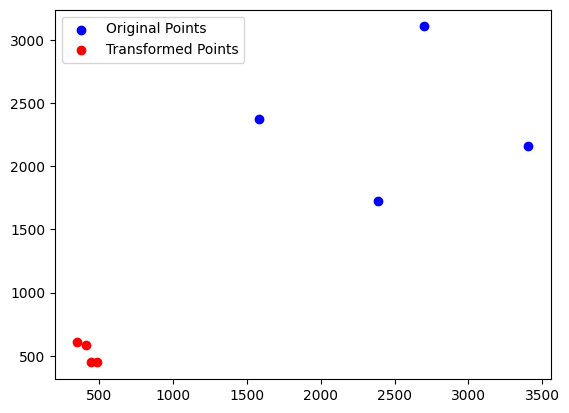

In [668]:
import numpy as np
import matplotlib.pyplot as plt

# Ваші 2D точки
points2D = np.array([[2387.7122, 1720.1545], [1581.192, 2368.9666], [2701.4697, 3104.4688], [3406.196, 2161.9297]], dtype=np.float32)

# Ваша матриця гомографії
H_2D = np.array([[0.8, 0.2, 0],
                 [0.1, 1.2, 0],
                 [0.001, 0.001, 1]], dtype=np.float32)

# Перетворення точок за допомогою матриці гомографії
transformed_points2D = np.dot(H_2D, np.vstack((points2D.T, np.ones(points2D.shape[0]))))
transformed_points2D = transformed_points2D[:2, :] / transformed_points2D[2, :]

# Малювання оригінальних та трансформованих точок
plt.scatter(points2D[:, 0], points2D[:, 1], color='b', label='Original Points')
plt.scatter(transformed_points2D[0, :], transformed_points2D[1, :], color='r', label='Transformed Points')
plt.legend()
plt.show()
